## Import Required Libraries

Importing the various libraries required for data analysis

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os
from PIL import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

Mounted at /content/drive


## Load Images

Creating the Load Image function to add the paths of each of the images into dataframes

In [ ]:
def load_images(base_path):

    data = []
    categories = os.listdir(base_path)

    for category in categories:
        category_path = os.path.join(base_path, category)

        images = os.listdir(category_path)

        # Loop through each image in the current category
        for image in images:
            image_path = os.path.join(category_path, image)
            data.append({'path': image_path, 'label': category})

    return pd.DataFrame(data)

image_directory = '/content/drive/MyDrive/CS444/Project/imgs/train/train'
df_images = load_images(image_directory)


print(df_images.head()) # check images

                                                path label
0  /content/drive/MyDrive/CS444/Project/imgs/trai...    c0
1  /content/drive/MyDrive/CS444/Project/imgs/trai...    c0
2  /content/drive/MyDrive/CS444/Project/imgs/trai...    c0
3  /content/drive/MyDrive/CS444/Project/imgs/trai...    c0
4  /content/drive/MyDrive/CS444/Project/imgs/trai...    c0


Checking tail of image to ensure different labels are present in the dataframe

In [ ]:
print(df_images.tail())

                                                    path label
22419  /content/drive/MyDrive/CS444/Project/imgs/trai...    c9
22420  /content/drive/MyDrive/CS444/Project/imgs/trai...    c9
22421  /content/drive/MyDrive/CS444/Project/imgs/trai...    c9
22422  /content/drive/MyDrive/CS444/Project/imgs/trai...    c9
22423  /content/drive/MyDrive/CS444/Project/imgs/trai...    c9


## Map Class Descriptions

The dataset consist of the below 10 classes:


* c0: safe driving
* c1: texting - right
* c2: talking on the phone - right
* c3: texting - left
* c4: talking on the phone - left
* c5: operating the radio
* c6: drinking
* c7: reaching behind
* c8: hair and makeup
* c9: talking to passenger

The below cell adds the categories to a dictionary and uses the .map function to map the path label column with the class descriptions.


In [ ]:
class_descriptions = {
    'c0': 'safe driving',
    'c1': 'texting - right',
    'c2': 'talking on the phone - right',
    'c3': 'texting - left',
    'c4': 'talking on the phone - left',
    'c5': 'operating the radio',
    'c6': 'drinking',
    'c7': 'reaching behind',
    'c8': 'hair and makeup',
    'c9': 'talking to passenger'
}

In [ ]:
df_images['description'] = df_images['label'].map(class_descriptions)

print(df_images.head())


                                                path label   description
0  /content/drive/MyDrive/CS444/Project/imgs/trai...    c0  safe driving
1  /content/drive/MyDrive/CS444/Project/imgs/trai...    c0  safe driving
2  /content/drive/MyDrive/CS444/Project/imgs/trai...    c0  safe driving
3  /content/drive/MyDrive/CS444/Project/imgs/trai...    c0  safe driving
4  /content/drive/MyDrive/CS444/Project/imgs/trai...    c0  safe driving


In [ ]:
print(df_images.tail())

                                                    path label  \
22419  /content/drive/MyDrive/CS444/Project/imgs/trai...    c9   
22420  /content/drive/MyDrive/CS444/Project/imgs/trai...    c9   
22421  /content/drive/MyDrive/CS444/Project/imgs/trai...    c9   
22422  /content/drive/MyDrive/CS444/Project/imgs/trai...    c9   
22423  /content/drive/MyDrive/CS444/Project/imgs/trai...    c9   

                description  
22419  talking to passenger  
22420  talking to passenger  
22421  talking to passenger  
22422  talking to passenger  
22423  talking to passenger  


## Class Count

Checking count of images per class

In [ ]:
class_counts = df_images['label'].value_counts()

print(class_counts)

label
c0    2489
c3    2346
c4    2326
c6    2325
c2    2317
c5    2312
c1    2267
c9    2129
c7    2002
c8    1911
Name: count, dtype: int64


## Image Dimentions

Checking shape and dimension of images

In [ ]:
df_images.describe()

path  label   description
count                                               22424  22424         22424
unique                                              22424     10            10
top     /content/drive/MyDrive/CS444/Project/imgs/trai...     c0  safe driving
freq                                                    1   2489          2489

In [ ]:
df_images.shape

(22424, 3)

## Visualize Two random images from each class

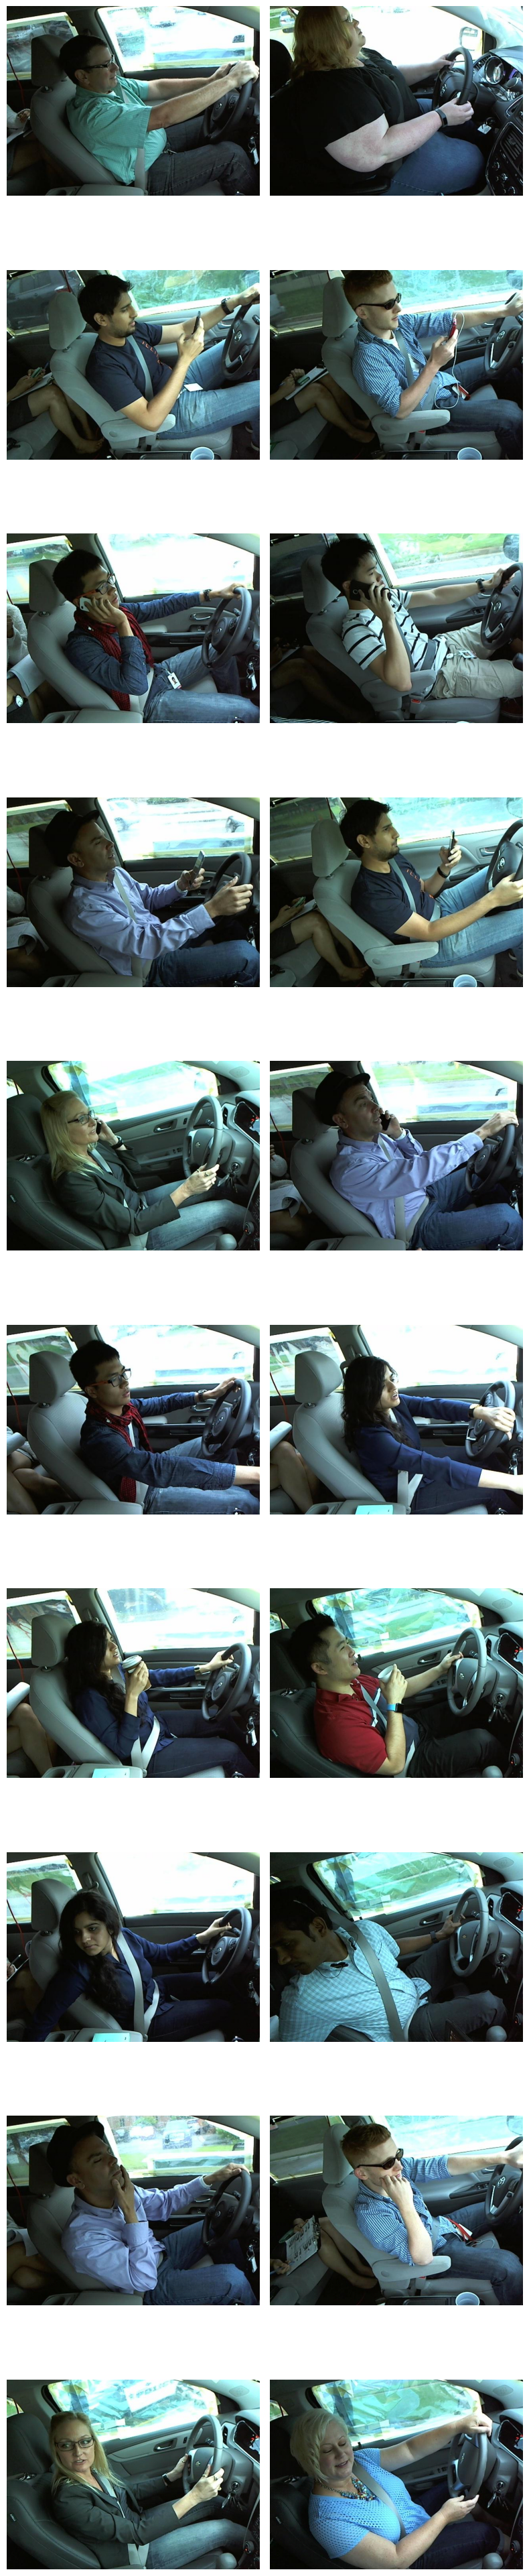

In [ ]:
def visualize_random_images_from_each_class(df, num_images=2):
    fig, axes = plt.subplots(nrows=len(df['label'].unique()), ncols=num_images, figsize=(num_images * 4, len(df['label'].unique()) * 4))
    for i, (label, group_df) in enumerate(df.groupby('label')):
        for j in range(num_images):
            random_index = random.choice(group_df.index)
            image_path = group_df.loc[random_index, 'path']
            img = Image.open(image_path)
            axes[i, j].imshow(img)
            axes[i, j].axis('off')
            if j == 0:
                axes[i, j].set_ylabel(class_descriptions[label], size='large')
    plt.tight_layout()
    plt.show()

visualize_random_images_from_each_class(df_images)

# Image Color Distribution Analysis



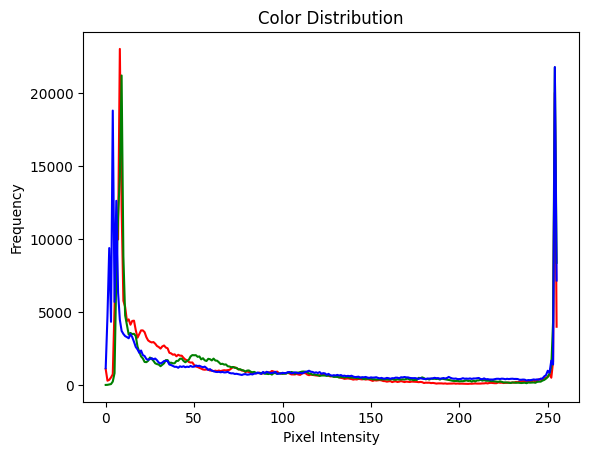

In [ ]:
def plot_color_histogram(image_path):
    with Image.open(image_path) as img:
        for i, color in enumerate(['r', 'g', 'b']):
            histogram = img.histogram()[i*256:(i+1)*256]
            plt.plot(histogram, color=color)
    plt.title("Color Distribution")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")


plot_color_histogram(df_images['path'].iloc[random.randint(0, len(df_images))])


The above histogram represents the distribution of pixel intensities across the three primary color channels — red, green, and blue. Below observations were made

- **Peaks at the Edges:**  Seeing spikes at the very dark (0) and very bright (255) parts means there's a lot of both super dark and super bright spots. It's a heads-up that the image might be either too bright or too dark in places.

- **Middle Lows:** Not many pixels fall in the middle range. This means the image might lack some details in those middle shades, making it less rich in variety.

- **High Contrast:** A lot of action at the extremes and not much in the middle tells us the image has bold contrasts. This makes the light and dark areas stand out sharply against each other.

- **Balanced Colors:** The red, green, and blue seem to follow the same pattern, suggesting the image has a nice color balance without any particular color overpowering the others.

